## About Project
In this project we will predict weather the customer left the bank (closed his account) or he continues for the given imbalanced data to be a customer by using artifical nural network.


## About Data
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer

## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

#### 2.Importing the table

In [7]:
dataset = pd.read_csv('Churn_Modelling.csv')
print(dataset.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(dataset.columns)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

#### 3.Describing data

In [8]:
print("Data Description")
print(dataset.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(dataset.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(dataset.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min     

In [9]:
print("Data percentaile")
print(dataset.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(dataset.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
1%       100.99000  1.556851e+07    432.000000     21.000000      0.000000   
2%       200.98000  1.557093e+07    452.000000     22.000000      0.000000   
3%       300.97000  1.557373e+07    468.000000     23.000000      0.000000   
4%       400.96000  1.557613e+07    479.000000     24.000000      0.000000   
5%       500.95000  1.557882e+07    489.000000     25.000000      1.000000   
6%       600.94000  1.558144e+07    497.940000     25.000000      1.000000   
7%       700.93000  1.558411e+07    504.000000     26.000000      1.000000   
8%       800.92000  1.558652e+07    511.000000 

#### 4.Checking for Null data and duplicates and removing them

In [10]:
print(dataset.isnull().any())

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


In [12]:
print(dataset.duplicated().any())
print(dataset[dataset.duplicated()])

False
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


###### There no duplicates present in this Dataset

## Visualizeing and Analysing the Data

#### 1.Customer closed his account or he continues

In [17]:
classes=dataset['Exited'].value_counts()
normal_share=round(classes[1]/dataset['Exited'].count()*100,2)
fraud_share=round(classes[0]/dataset['Exited'].count()*100, 2)
print("Customer closed his account : {} %".format(normal_share))
print("    continued : {} %".format(fraud_share))

Customer closed his account : 20.37 %
    continued : 79.63 %


#### 2.Visualizeing Count of Fraudulent and Non Fraudulent activitys preasent in transaction

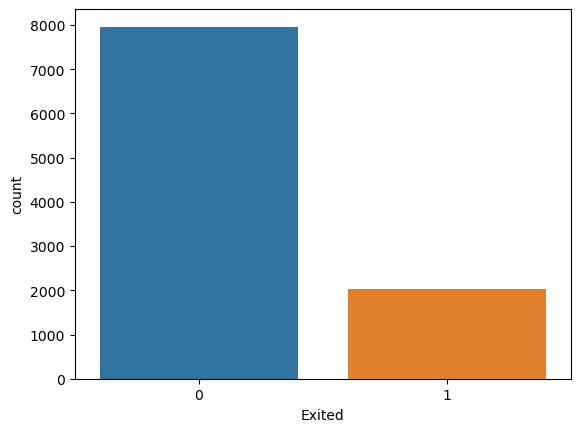

In [18]:
sns.countplot(data=dataset,x="Exited")
plt.show()

In [15]:
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


##### 3.Created a scatter plot to observe the distribution of classes with time

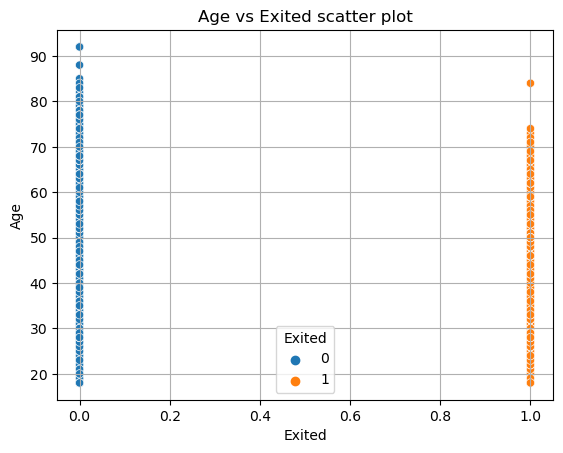

In [23]:
sns.scatterplot( dataset["Exited"],dataset["Age"],hue=dataset["Exited"])
plt.title("Age vs Exited scatter plot")
plt.grid()
plt.show()

#### From this we can see that ahe age in high some people are closing there bank weather it can be wontedly or they can be late

In [24]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [29]:
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


#### Encoding categorical data

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [36]:
X

array([[0, 0, 42, ..., 1, 1, 101348.88],
       [2, 0, 41, ..., 0, 1, 112542.58],
       [0, 0, 42, ..., 1, 0, 113931.57],
       ...,
       [0, 0, 36, ..., 0, 1, 42085.58],
       [1, 1, 42, ..., 1, 0, 92888.52],
       [0, 0, 28, ..., 1, 0, 38190.78]], dtype=object)

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.f## Predection 1it_transform(X_train)
X_test = sc.transform(X_test)


## Prediction

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [40]:
model

In [41]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [42]:
grid_result = grid.fit(X_train, y_train)

In [56]:
print([grid_result.best_score_,grid_result.best_params_])

[0.8425000071525574, {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}]


In [44]:
pred_y = grid.predict(X_test)

63/63 [==============================] - 2s 3ms/step


## Analysing the prediction

In [55]:
print(pred_y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [46]:
y_pred = (pred_y > 0.5)

In [54]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


## Score

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [53]:
print(cm)

[[1532   63]
 [ 272  133]]


In [50]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [52]:
print(score)

0.8325
